In [3]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/tang/Documents/DSBA/ML/train-balanced-sarcasm.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [3]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
df['label'].value_counts()

label
0    505413
1    505413
Name: count, dtype: int64

In [5]:
#drop the missing comments
df.dropna(subset=['comment'], inplace=True)

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

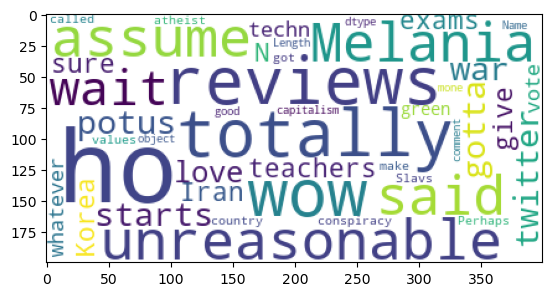

In [7]:
wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS, max_words = 200, max_font_size = 80)
wordcloud.generate(str(df.loc[df['label'] == 1, 'comment']))
plt.imshow(wordcloud)

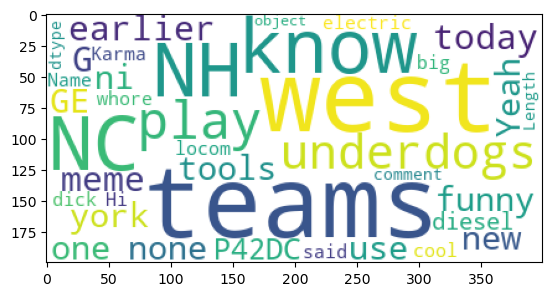

In [8]:
wordcloud.generate(str(df.loc[df['label'] == 0, 'comment']))
plt.imshow(wordcloud)

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Lower the text, even if sarcasm can be do using maj. We lower all the letter to have a better model performance
    text = text.lower()

    # remove the user refeerences because it doesn't have an impact in the detection and it can add confusions
    text = re.sub(r"@\w+", "", text)

    # replace all the urls by a '<URL>' to have the same token for all the urls
    text = re.sub(r"http\S+|www\S+|https\S+", "<URL>", text, flags=re.MULTILINE)

    # Same for the digits
    text = re.sub(r"\d+", "<NUM>", text)

    # remove the space
    text = text.strip()

    # tokenise the text
    tokens = nltk.word_tokenize(text)

    # Use lemmatizer to reduce words to their base forms
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin the tokens
    cleaned_text = " ".join(tokens)

    return cleaned_text

In [10]:
df['comment'] = df['comment'].fillna("").astype(str)

In [11]:
df['clean_com'] = df['comment'].apply(preprocess_text)
df['clean_parent_com'] = df['parent_comment'].apply(preprocess_text)
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,clean_com,clean_parent_com
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",nc and nh .,"yeah , i get that argument . at this point , i..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,you do know west team play against west team m...,the blazer and maverick ( the west < NUM > and...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"they were underdog earlier today , but since g...",they 're favored to win .
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,this meme is n't funny none of the `` new york...,deadass do n't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,i could use one of those tool .,yep can confirm i saw the tool they use for th...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010825
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   label             1010771 non-null  int64 
 1   comment           1010771 non-null  object
 2   author            1010771 non-null  object
 3   subreddit         1010771 non-null  object
 4   score             1010771 non-null  int64 
 5   ups               1010771 non-null  int64 
 6   downs             1010771 non-null  int64 
 7   date              1010771 non-null  object
 8   created_utc       1010771 non-null  object
 9   parent_comment    1010771 non-null  object
 10  clean_com         1010771 non-null  object
 11  clean_parent_com  1010771 non-null  object
dtypes: int64(4), object(8)
memory usage: 100.3+ MB


In [14]:
df.to_csv('/home/tang/Téléchargements/sarcasm_data_preprocessed.csv', index=False)

In [10]:
df_twitter = pd.read_csv('/home/tang/Documents/DSBA/ML/sarcasm/twitter_data.csv')
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [11]:
df_twitter['class'].value_counts()

class
figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: count, dtype: int64

In [12]:
df_twitter['class'] = df_twitter['class'].apply(lambda x: 1 if x == 'sarcasm' else 0)
df_twitter['class'].value_counts()

class
0    60727
1    20681
Name: count, dtype: int64

In [13]:
df_sarcasm = df_twitter[df_twitter['class'] == 1]     # minority class (sarcasm)
df_not_sarcasm = df_twitter[df_twitter['class'] == 0] # majority class (all others)

# Count how many sarcasm samples you have
count_sarcasm = len(df_sarcasm)

df_not_sarcasm_under = df_not_sarcasm.sample(n=count_sarcasm, random_state=42)

# Combine the undersampled majority class with the minority class
df_balanced = pd.concat([df_sarcasm, df_not_sarcasm_under])

# Shuffle the rows (optional but recommended)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41362 entries, 0 to 41361
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  41362 non-null  object
 1   class   41362 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 646.4+ KB


In [14]:
df_balanced.head()

,tweets,class
0,"Since there's a lot of English teachers on IG,...",1
1,Company profile EMMANUEL PRINCE OF PEACE CHURC...,0
2,Completely stunned Kam Chancellor didn't win h...,0
3,"We have Money 4 Bombs, to over throw Govt, &a...",0
4,Late dinner #happy #dinner #late #be #fat #nas...,0


In [15]:
df_balanced['tweets'] = df_balanced['tweets'].apply(preprocess_text)
df_balanced.head()

,tweets,class
0,since there 's a lot of english teacher on ig ...,1
1,company profile emmanuel prince of peace churc...,0
2,completely stunned kam chancellor did n't win ...,0
3,"we have money < NUM > bomb , to over throw gov...",0
4,late dinner # happy # dinner # late # be # fat...,0


In [16]:
df_balanced.to_csv('/home/tang/Téléchargements/sarcasm_data_preprocessed.csv', index=False)

In [22]:
import pandas as pd
df = pd.read_csv('sarcasm_data_preprocessed.csv')
print(df.head())

df_sarcastic = df[df['label'] == 1]

# Define segments based on frequent words (by theme)
def segment_comment(comment):
    if any(word in comment.lower() for word in ["totally", "wow", "sure", "called", "name", "perhaps", "gotta", "starts"]):
        return "Sarcastic tone"
    elif any(word in comment.lower() for word in ["reviews", "review", "assume", "wait", "unreasonable","whatever", "good", "love"]):
        return "Opinion"
    elif any(word in comment.lower() for word in ["melania", "atheist", "potus", "korea", "iran", "war","twitter", "conspiracy","country", "capitalism","green", "slavs", "vote"]):
        return "Politic"
    elif any(word in comment.lower() for word in ["teachers", "exam", "values"]):
        return "Education or social"
    else:
        return "Other"

# Applying segmentation to comments
df_sarcastic["Segment"] = df_sarcastic["comment"].apply(segment_comment)

# Results
print(df_sarcastic[["comment", "Segment"]].head())

# Count segments to see the distribution
print(df_sarcastic["Segment"].value_counts())



   label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  \
0  Yeah, I get that argument. At this point, I'd ...  

/var/folders/gn/hcjhfj5n35d8xk2cbgh7j49h0000gn/T/ipykernel_30006/3017381393.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sarcastic["Segment"] = df_sarcastic["comment"].apply(segment_comment)


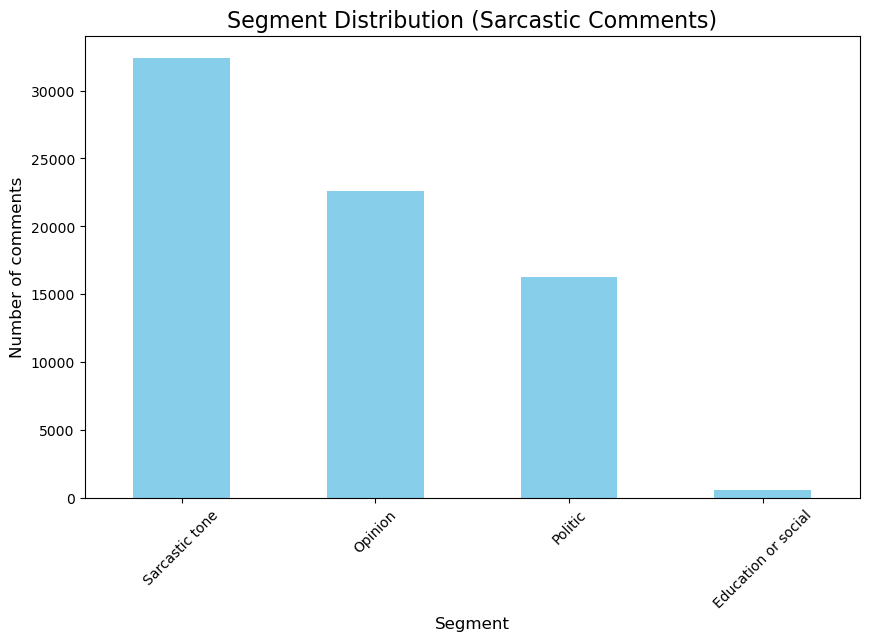

In [31]:
# Convert all values in the 'clean_com' column to strings
df["clean_com"] = df["clean_com"].fillna("").astype(str)

# Filter out sarcastic comments (label = 1) by creating an explicit copy
df_sarcastic = df[df['label'] == 1].copy()

# Define segments based on frequent words
def segment_comment(comment):
    if any(word in comment.lower() for word in ["totally", "wow", "sure", "called", "name", "perhaps", "gotta", "starts"]):
        return "Sarcastic tone"
    elif any(word in comment.lower() for word in ["reviews", "review", "assume", "wait", "unreasonable", "whatever", "good", "love"]):
        return "Opinion"
    elif any(word in comment.lower() for word in ["melania", "atheist", "potus", "korea", "iran", "war", "twitter", "conspiracy", "country", "capitalism", "green", "slavs", "vote"]):
        return "Politic"
    elif any(word in comment.lower() for word in ["teachers", "exam", "values"]):
        return "Education or social"
    

# Applying segmentation to sarcastic comments
df_sarcastic["Segment"] = df_sarcastic["clean_com"].apply(segment_comment)

# View segment distribution for sarcastic comments
import matplotlib.pyplot as plt

df_sarcastic["Segment"].value_counts().plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Segment Distribution (Sarcastic Comments)", fontsize=16)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Number of comments", fontsize=12)
plt.xticks(rotation=45)
plt.show()